**Nama:** Insania Cindy Puan Fadilahsari

**Email:** insaniacindy12312@gmail.com

**ID Dicoding:** insanniaa

# **1. Perkenalan Dataset**


Sumber dataset : https://www.kaggle.com/datasets/denizcanoguz/online-retail-ii

Dataset yang digunakan dalam proyek ini berasal dari Online Retail II di Kaggle. Dataset ini terdiri dari data transaksi ritel online yang mencatat penjualan barang dari sebuah perusahaan yang berbasis di Inggris. Dataset ini memiliki informasi terkait dengan transaksi penjualan, termasuk detail produk, harga, jumlah, dan informasi pelanggan.

Berikut adalah penjelasan mengenai kolom-kolom yang terdapat dalam dataset online_retail_ii_csv:
- Invoice : nomor faktur yang mempresentasikan penjualan barang
- StockCode : kode unik setiap produk yang dijual
- Description : nama produk
- Quantity : jumlah barang yang dibeli dalam transaksi
- InvoceDate : tanggal dan waktu saat transaksi dilakukan
- Price : harga barang yang dijual
- Customer ID : id pelanggan yang melakukan transaksi
- Country : negara asal pelanggan berasal

# **2. Import Library**

In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekmlpemula/online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# **4. Exploratory Data Analysis (EDA)**

## Memahami Struktur Data

In [ ]:
df.shape

(1067371, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Berdasarkan informasi di atas, dapat diketahui bahwa dataset retail terdiri dari 1067371 baris dan 8 kolom. Selain itu, dapat dilihat bahwa tipe data kolom Customer ID perlu dirubah menjadi integer dan tipe data kolom InvoiceDate perlu dirubah menjadi datetime

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


## Mengidentifikasi Missing Values

In [ ]:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


Berdasarkan hasil di atas, dapat diketahui bahwa terdapat missing values pada kolom Description dan Customer yang perlu dianalisis dan ditangani lebih lanjut.

## Analisis dan Visualisasi Distribusi serta Korelasi

Memilih kolom numerik

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Kolom numerikal:", numerical_columns.tolist())

Kolom numerikal: ['Quantity', 'Price', 'Customer ID']


Memilih kolom kategorikal

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", categorical_columns.tolist())

Kolom kategorikal: ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country']


Melakukan visualisasi distribusi kolom numerik

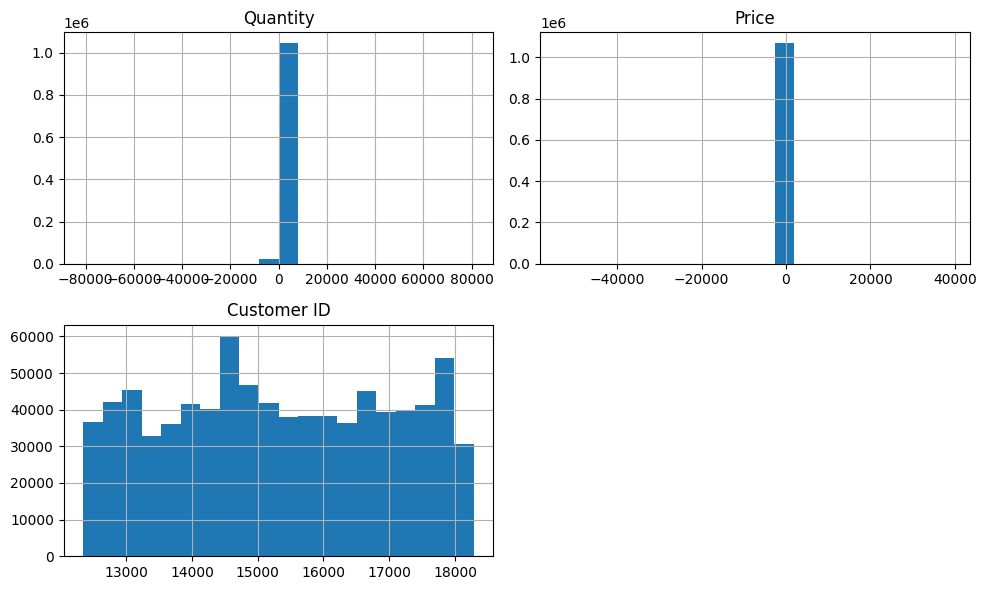

In [ ]:
df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat diketahui bahwa distribusi kolom Quantity dan Price sangat tidak seimbang dengan mayoritas data terkonsentrasi dekat nol. Sedangkan, distribusi kolom Customer ID cukup merata, namun Customer ID tidak seharusnya dianalisis karena dia sebagai identitas

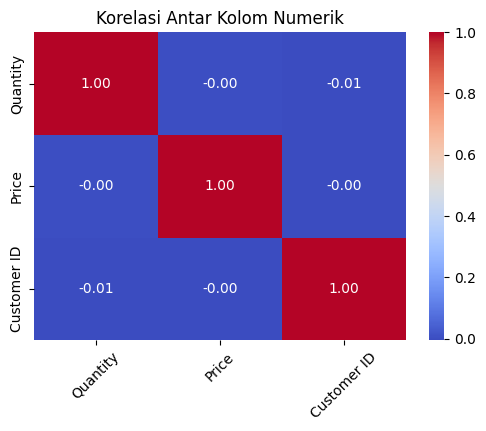

In [ ]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 10})
plt.title("Korelasi Antar Kolom Numerik", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, dapat diketahui bahwa antar kolom Customer ID, Price, dan Quantity tidak berkorelasi.

## Mengidentifikasi Outlier

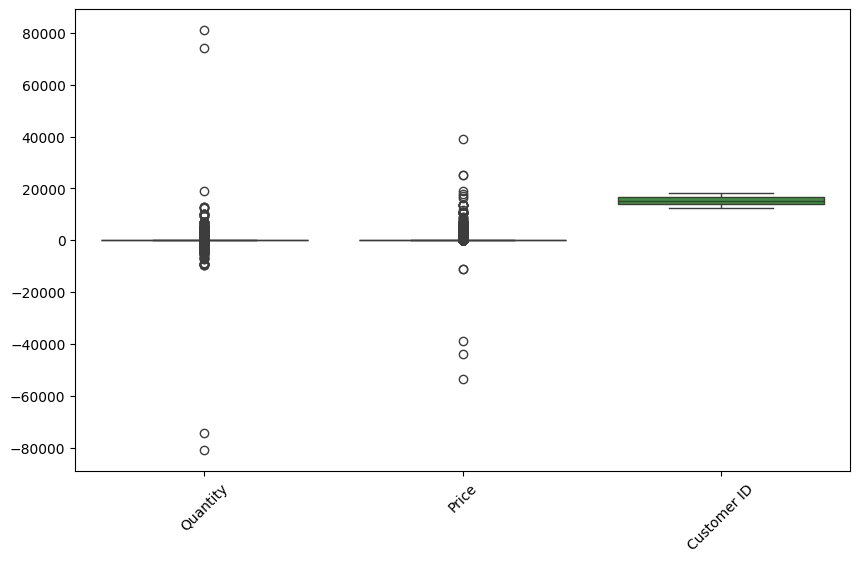

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Quantity', 'Price', 'Customer ID',]])
plt.xticks(rotation = 45)
plt.show()

Berdasarkan hasil di atas, dapat dilihat bahwa terdapat outlier pada kolom Quantity dan Price yang perlu ditangani lebih lanjut.

# **5. Data Preprocessing**

## Menangani Missing Values

Menghapus missing values pada kolom Customer ID karena Customer ID merupakan informasi penting yang tidak bisa ditebak atau diganti sembarangan. Maka, jika terdapat missing values didalamnya, lebih baik dihapus untuk menjaga integritas datanya.

In [ ]:
df.dropna(subset=["Customer ID"], inplace=True)

## Merubah Tipe Data

Berdasarkan identifikasi yang telah dilakukan sebelumnya, bahwa terdapat beberapa kolom yang tipe datanya masih belum tepat.

### Merubah tipe data Customer ID dari Float menjadi Integer

In [ ]:
df["Customer ID"] = df["Customer ID"].astype(int)

### Merubah tipe data InvoiceDate dari Object menjadi Datetime

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


Berdasarkan informasi di atas, dapat diketahui bahwa tipe data pada kolom Customer ID dan InvoiceDate berhasil dirubah.

## Menghapus Data Pada Kolom Invoice yang Mengandung Karakter 'C'

Data pada kolom Invoice yang mengandung karakter 'C' dianggap transaksi yang gagal atau cancel, maka dari itu perlu dihapus karena tidak mencerminkan transaksi yang berhasil.

### Memeriksa apakah ada transaksi yang mengandung karakter 'C'

In [ ]:
df['Invoice'].str.contains('C', na=False).any()

np.True_

### Menampilkan transaksi yang mengandung karakter 'C'

In [ ]:
df[df['Invoice'].str.contains('C', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


Berdasarkan data di atas, dapat diketahui bahwa terdapat 18744 data pada kolom Invoice yang mengandung karakter 'C'. Artinya, terdapat 18744 transaksi yang dibatalkan.

### Memfilter transaksi yang tidak mengandung karakter 'C'

In [ ]:
data=df[~df['Invoice'].astype(str).str.contains('C')]

### Menghapus transaksi yang mengandung karakter 'C'

In [ ]:
data=data.dropna(subset=['Customer ID'])

### Memeriksa kembali apakah masih ada transaksi yang mengandung karakter 'C'

In [ ]:
data['Invoice'].str.contains('C', na=False).any()

np.False_

Berdasarkan hasil tersebut, dapat diketahui bahwa transaksi gagal berhasil dihapus.

## Menangani Outlier

Bedasarkan identifikasi yang telah dilakukan sebelumnya, dapat diketahui bahwa terdapat kolom yang memiliki outlier didalamnya dan perlu ditangani lebih lanjut, yaitu kolom Quantity dan Price.

Untuk menangani outlier, disini saya menggunakan teknik IQR (Interquartile Range) karena metode ini dia tidak menghilangkan data yang mungkin masih relevan.

Mekanismenya yaitu dia menghitung rentang antara nilai kuartil pertama (Q1) dan kuartil ketiga (Q3). Kuartil pertama adalah nilai tengah dari separuh data bagian bawah, sedangkan kuartil ketiga adalah nilai tengah dari separuh data bagian atas. Lalu, menentukan batas bawah dan batas atas yang wajar bagi data, biasanya saya menghitng batas bawah dengan Q1 dikurangi dengan 1.5 kali IQR dan batas atasnya Q3 ditambah 1.5*IQR. Setelah itu, nilai yang jauh lebih kecil atau lebih besar dari nilai yang seharusnya diganti dengan nilai yang lebih wajar atau nilai yang tidak terlalu jauh dari sebagian besar data lainnya. Jadi, nilai yang jauh lebih kecil dari seharusnya akan diganti menjadi nilai batas bawah, dan nilai yang  jauh lebih besar dari seharusnya diganti dengan nilai batas atas.

### Menangani outlier pada kolom Quantity

In [ ]:
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['Quantity'] = np.clip(data['Quantity'], lower_bound, upper_bound)

### Menangani outlier pada kolom Quantity

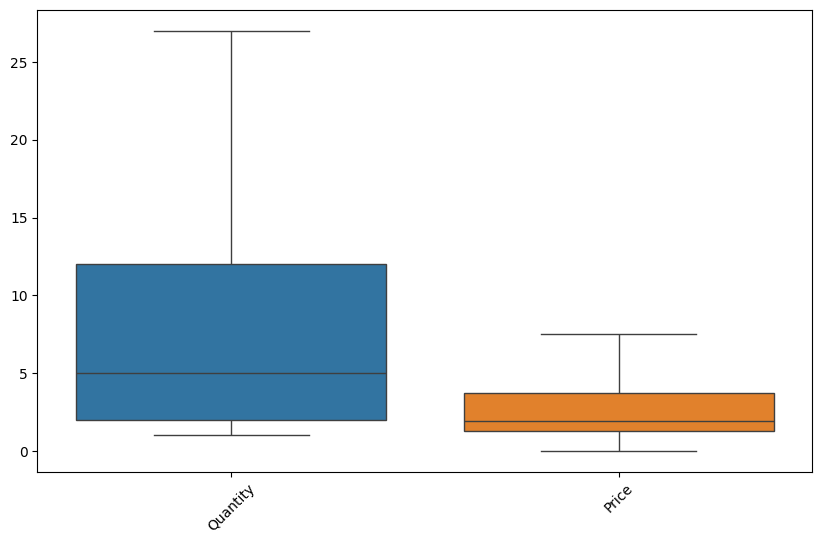

In [ ]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['Price'] = np.clip(data['Price'], lower_bound, upper_bound)

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Quantity', 'Price']])
plt.xticks(rotation = 45)
plt.show()

Berdasarkan hasil visualisasi diatas, dapat diketahui bahwa outlier sudah berhasil ditangani.

## Membuat Kolom totalPrice

Membuat kolom totalPrice yang nantinya akan digunakan dalam RFM analisis. Kolom totalPrice merupakan hasil perhitungan dari data kolom quantity dengan data kolom price.

In [ ]:
data['totalPrice'] = data['Quantity'] * data['Price']

## Menghitung Recency

Recency analisis digunakan untuk mengetahui seberapa baru seorang pelanggan melakukan transaksi terakhir dari data diambil. Oleh karena itu, saya perlu mengetahui kapan transaksi terakhir yang tercatat.

In [ ]:
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

Berdasarkan hasil di atas, transaksi terakhir yang tercatat pada dataset Online Retail terjadi pada 9 Desember 2011 pukul 12.50. Oleh karena itu, untuk menghitung seberapa baru masing-masing pelanggan melakukan transaksi terakhirnya (recency), tanggal tersebut akan dianggap sebagai acuan atau "hari ini" dalam perhitungan.

In [ ]:
today_date = dt.datetime(2011, 12, 9, 12, 50)

Melakukan penggabungan kolom Customer ID dengan tanggal tranksaksi terakhir pada setiap pelanggan.

In [ ]:
recency = data.groupby("Customer ID").agg({"InvoiceDate": "max"}).rename(columns={"InvoiceDate": "Recency"})

In [ ]:
recency

,Recency
Customer ID,
12346,2011-01-18 10:01:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00
...,...
18283,2011-12-06 12:02:00
18284,2010-10-04 11:33:00
18285,2010-02-17 10:24:00


Melakukan perhitungan berapa hari sejak transaksi terakhir pada masing-masing pelanggan

In [ ]:
recency["Recency"] = (today_date - recency["Recency"]).apply(lambda x: x.days)
recency

,Recency
Customer ID,
12346,325
12347,1
12348,74
12349,18
12350,309
...,...
18283,3
18284,431
18285,660


## Menghitung Frequency

Melakukan perhitungan frequency untuk mengetahui seberapa sering pelanggan melakukan transaksi.

In [ ]:
frequency = data.groupby("Customer ID").agg({"Invoice":"nunique"}) #mengelompokkan data berdasarkan customer ID dan setiap pelanggan dihitung jumlah invoice yg unik untuk mengetahui jumlah transaksi uniknya
frequency.rename(columns={"Invoice": "Frequency"}, inplace=True)
frequency = frequency.sort_values(by = "Frequency", ascending=False)
frequency

,Frequency
Customer ID,
14911,398
12748,337
17841,211
15311,208
13089,203
...,...
14783,1
14782,1
18234,1


## Menghitung Monetary

Melakukan perhitungan monetary untuk menghitung berapa total pengeluaran yang dikeluarkan oleh masing-masing pelanggan selama bertransaksi disini.

In [ ]:
monetary = data.groupby("Customer ID").agg({"totalPrice":"sum"}) #mengelompokkan data berdasarkan customer ID dan setiap pelanggan dijumlahkan semua totalPricenya untuk menghitung total seluruh pengeluaran selama bertransaksi disini.
monetary.rename(columns={"totalPrice" : "Monetary"}, inplace=True)
monetary = monetary.sort_values(by = "Monetary", ascending=False)
monetary

,Monetary
Customer ID,
14911,236161.09
14646,158928.51
14156,121784.44
13089,93700.25
18102,91531.68
...,...
13788,3.75
14095,2.95
13256,0.00


## Menggabungkan Data RFM

In [ ]:
rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,12,400.94
12347,1,8,5175.41
12348,74,5,779.73
12349,18,4,3347.99
12350,309,1,301.90
...,...,...,...
18283,3,22,2703.00
18284,431,1,374.03
18285,660,1,229.55


## Mengidentifikasi Outlier pada Data RFM

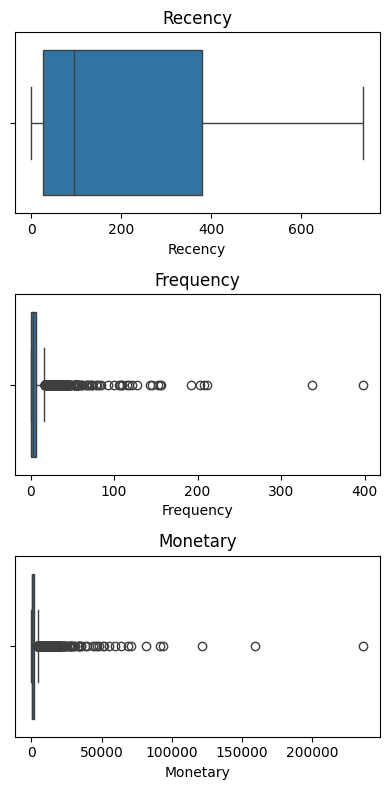

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,12,400.94
12347,1,8,5175.41
12348,74,5,779.73
12349,18,4,3347.99
12350,309,1,301.90
...,...,...,...
18283,3,22,2703.00
18284,431,1,374.03
18285,660,1,229.55


In [ ]:
plt.figure(figsize=(4, 8))

#visualisasi kolom 'Recency'
plt.subplot(3, 1, 1)
sns.boxplot(x = rfm['Recency'])
plt.title('Recency')

#visualisasi kolom 'Frequency'
plt.subplot(3, 1, 2)
sns.boxplot(x = rfm['Frequency'])
plt.title('Frequency')

#visualisasi kolom 'Monetary'
plt.subplot(3, 1, 3)
sns.boxplot(x = rfm['Monetary'])
plt.title('Monetary')

plt.tight_layout()
plt.show()
rfm

Berdasarkan visualiasi diatas, dapat diketahui bahwa outlier ditemukan pada kolom Frequency dan Monetary, oleh karena itu perlu dilakukan analisis lebih lanjut.

## Menangani Outlier pada Data RFM

In [ ]:
Q1 = rfm['Frequency'].quantile(0.25)
Q3 = rfm['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
rfm['Frequency'] = np.clip(rfm['Frequency'], lower_bound, upper_bound)

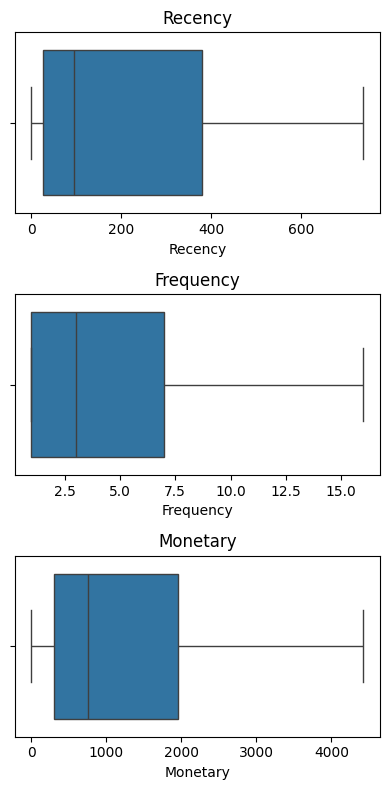

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,12,400.940
12347,1,8,4426.775
12348,74,5,779.730
12349,18,4,3347.990
12350,309,1,301.900
...,...,...,...
18283,3,16,2703.000
18284,431,1,374.030
18285,660,1,229.550


In [ ]:
Q1 = rfm['Monetary'].quantile(0.25)
Q3 = rfm['Monetary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
rfm['Monetary'] = np.clip(rfm['Monetary'], lower_bound, upper_bound)

plt.figure(figsize=(4, 8))

#visualisasi kolom 'Recency'
plt.subplot(3, 1, 1)
sns.boxplot(x = rfm['Recency'])
plt.title('Recency')

#visualisasi kolom 'Frequency'
plt.subplot(3, 1, 2)
sns.boxplot(x = rfm['Frequency'])
plt.title('Frequency')

#visualisasi kolom 'Monetary'
plt.subplot(3, 1, 3)
sns.boxplot(x = rfm['Monetary'])
plt.title('Monetary')

plt.tight_layout()
plt.show()

rfm

Berdasarkan visualisasi di atas, dapat diketahui bahwa outlier pada kolom Frequency dan Monetary berhasil ditangani.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Membangun model clustering dengan algoritma K-Means Clustering

### Mencari Nilai K Optimal

Mencari jumlah cluster yang optimal menggunakan Silhouette Score

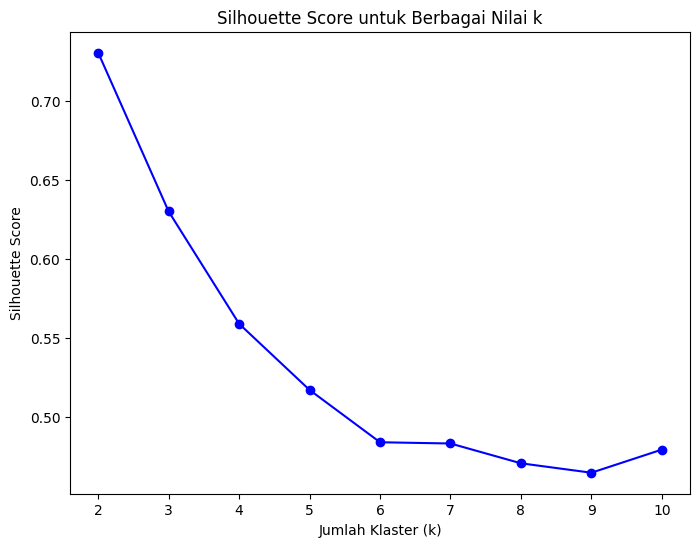

In [ ]:
range_n_clusters = list(range(2, 11))
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm)

    #menghitung silhouette score
    score = silhouette_score(rfm, cluster_labels)
    silhouette_scores.append(score)
#visualisasi silhouette score pada berbagai nilai k 2-11
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score untuk Berbagai Nilai k')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'Jumlah klaster optimal berdasarkan Silhouette Score adalah: {best_k}')

Jumlah klaster optimal berdasarkan Silhouette Score adalah: 2


### Melatih Model

Melatih model KMeans dengan jumlah cluster sesuai dengan best klaster yang telah diperoleh sebelumnya dan menggunakan dataframe RFM.

In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(rfm)

## **b. Evaluasi Model Clustering**

Melakukan evaluasi model menggunakan Silhouette Score untuk menilai seberapa baik hasil clustering yang telah dibuat, termasuk apakah pelanggan dalam satu cluster cukup mirip dan apakah pelanggan yang beda cluster cukup berbeda.

In [ ]:
ss = silhouette_score(rfm, cluster_labels)
print(f'Silhouette Score: {ss}')

Silhouette Score: 0.7307942218068055


Berdasarkan hasil tersebut, dapat diketahui bahwa nilai Silhouette Score yang didapat sebesar 0.73 yang menunjukkan bahwa hasil clustering yang terbentuk memiliki kualitas yang cukup baik.

## **c. Visualisasi Hasil Clustering**

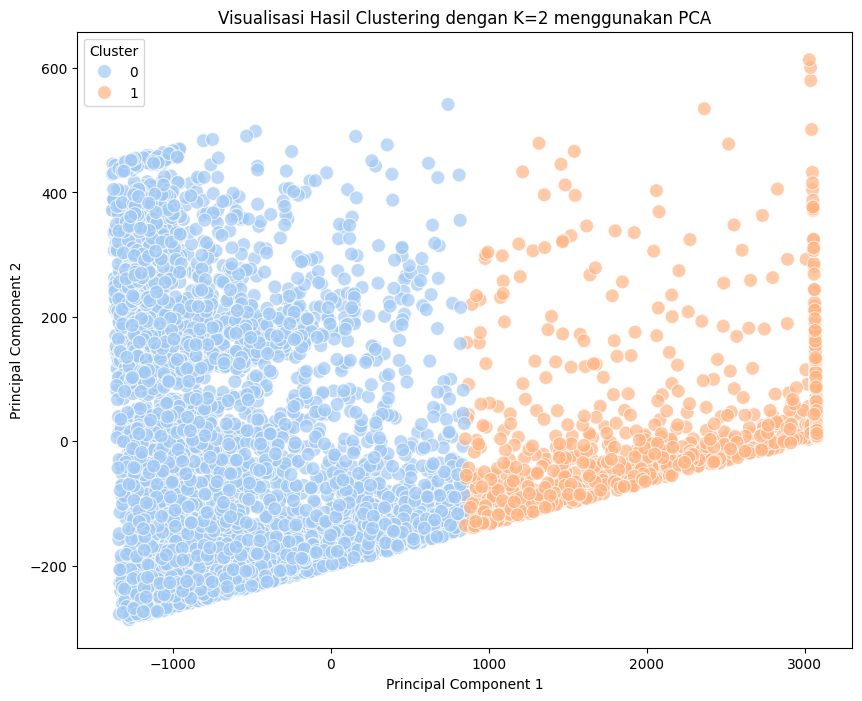

In [ ]:
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm)

plt.figure(figsize=(10, 8))

sns.scatterplot(x=rfm_pca[:, 0], y=rfm_pca[:, 1], hue=cluster_labels, palette="pastel", s=100, alpha=0.7)
plt.title(f'Visualisasi Hasil Clustering dengan K={best_k} menggunakan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Berdasarkan visualisasi di atas, dapat diketahui bahwa distribusi dua cluster  tampak jelas terpisah. Hal ini menunjukkan bahwa dua cluster yang dihasilkan cukup berbeda berdasarkan karakteristik RFMnya.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Menggabungkan Kolom 'Cluster' dengan Dataset RFM

In [ ]:
rfm['Cluster'] = cluster_labels

In [ ]:
rfm

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346,325,12,400.940,0
12347,1,8,4426.775,1
12348,74,5,779.730,0
12349,18,4,3347.990,1
12350,309,1,301.900,0
...,...,...,...,...
18283,3,16,2703.000,1
18284,431,1,374.030,0
18285,660,1,229.550,0


### Menghitung Anggota Masing-Masing Cluster

In [ ]:
rfm['Cluster'].value_counts()

,count
Cluster,
0,4568
1,1313


Berdasarkan hasil tersebut, dapat diketahui bahwa cluster 0 memiliki 4568 anggota dan cluster 1 memiliki 1313 anggota.

### Mengetahui Dsitribusi Nilai dalam Cluster

In [ ]:
for cluster_num in range(best_k):
    cluster_data = rfm[rfm['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} - Deskripsi:")
    print(cluster_data.describe())
    print("\n")

Cluster 0 - Deskripsi:
           Recency    Frequency     Monetary  Cluster
count  4568.000000  4568.000000  4568.000000   4568.0
mean    241.129378     2.978765   672.836092      0.0
std     215.326922     2.438692   547.520209      0.0
min       0.000000     1.000000     0.000000      0.0
25%      43.000000     1.000000   229.595000      0.0
50%     180.000000     2.000000   502.465000      0.0
75%     410.000000     4.000000   996.035000      0.0
max     738.000000    16.000000  2199.590000      0.0


Cluster 1 - Deskripsi:
           Recency    Frequency     Monetary  Cluster
count  1313.000000  1313.000000  1313.000000   1313.0
mean     58.958873    11.578065  3730.637173      1.0
std      97.271370     4.191696   796.418723      0.0
min       0.000000     1.000000  2196.100000      1.0
25%       8.000000     8.000000  2958.390000      1.0
50%      23.000000    12.000000  4218.360000      1.0
75%      60.000000    16.000000  4426.775000      1.0
max     609.000000    16.000000  4

### Interpretasi

1. Cluster 0:
  - Recency: Nilai rata-rata untuk Recency adalah 241, dengan penyebaran yang cukup luas (standar deviasi 215). Rentang nilai untuk Recency bervariasi antara 0 hingga 738, yang menunjukkan bahwa sebagian besar pelanggan dalam cluster ini memiliki pembelian yang lebih lama (nilai Recency lebih tinggi). Namun, beberapa pelanggan memiliki pembelian yang sangat baru (nilai Recency rendah).
  - Frequency: Nilai rata-rata Frequency adalah 2.98, dengan standar deviasi 2.44, menunjukkan bahwa pelanggan dalam cluster ini melakukan sekitar 3 transaksi, meskipun ada variasi yang besar. Frekuensi transaksi berkisar dari 1 hingga 16.
  - Monetary: Rata-rata Monetary adalah 672.84, dengan standar deviasi 547.52. Pembelian dalam cluster ini cukup beragam, dengan transaksi mulai dari yang sangat kecil hingga yang lebih besar. Namun, rata-rata transaksi berada dalam kisaran yang relatif moderat dibandingkan dengan Cluster 1.
  - Recency menunjukkan bahwa sebagian besar pelanggan dalam cluster ini telah melakukan transaksi lebih lama (nilai Recency yang lebih tinggi). Mereka mungkin adalah pelanggan yang lebih jarang berbelanja atau sudah tidak aktif dalam waktu dekat.
  - Frequency dan Monetary menunjukkan adanya pola yang sangat bervariasi dalam perilaku belanja. Ada beberapa pelanggan dengan banyak transaksi dan pembelian yang lebih besar, tetapi sebagian besar berada pada frekuensi transaksi yang lebih rendah dan pembelian yang lebih kecil.

  Kesimpulan:
  Pelanggan Cluster 0 cenderung lebih jarang melakukan transaksi dan lebih memilih pembelian yang lebih kecil dibandingkan dengan Cluster 1. Mereka mungkin pelanggan yang lebih tidak aktif dan perlu diperhatikan untuk retargeting atau kampanye pemasaran.

2. Cluster 1:
  - Recency: Rata-rata nilai Recency adalah 58.96, yang menunjukkan bahwa pelanggan dalam cluster ini baru-baru ini melakukan transaksi. Rentang nilai Recency untuk Cluster 1 berkisar antara 0 hingga 609, dengan mayoritas pelanggan memiliki Recency yang sangat rendah, menunjukkan bahwa mereka baru-baru ini aktif dalam berbelanja
  - Frequency: Dengan nilai rata-rata 11.58, pelanggan di cluster ini cenderung memiliki frekuensi transaksi yang lebih tinggi (lebih dari 10 transaksi). Sebagian besar pelanggan melakukan transaksi antara 8 hingga 16 kali, menunjukkan bahwa mereka adalah pelanggan yang lebih loyal dan aktif.
  - Monetary: Rata-rata Monetary dalam cluster ini sangat tinggi, yaitu 3730.64, dengan nilai maksimum 4426.78. Ini menunjukkan bahwa pelanggan dalam cluster ini melakukan pembelian dengan nilai yang sangat tinggi, dan transaksi mereka lebih bernilai dibandingkan dengan Cluster 0.
  - Recency menunjukkan bahwa pelanggan dalam cluster ini baru saja melakukan pembelian, sehingga mereka lebih aktif dan mungkin lebih loyal.
  - Frequency dan Monetary mengindikasikan bahwa pelanggan dalam cluster ini melakukan banyak pembelian dengan nilai yang besar, yang menunjukkan bahwa mereka adalah pelanggan yang sangat berharga bagi bisnis.

  Kesimpulan:
  Pelanggan Cluster 1 adalah pelanggan yang sangat aktif dan memiliki nilai pembelian yang tinggi. Mereka mungkin adalah pelanggan loyal yang dapat diprioritaskan dalam strategi pemasaran dan penawaran khusus.


Hasil clustering ini dapat membantu proses segmentasi pelanggan yang bermanfaat untuk membuat strategi pemasaran yang lebih spesifik untuk masing-masing clusternya.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
rfm.to_csv('/content/drive/MyDrive/Colab Notebooks/projekmlpemula/rfmclustering.csv', index=False)